In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Read

In [3]:
# Read the data 
df = pd.read_csv(r'D:\Excel files\go too college dataset\data.csv')
df.head() # Get the first five rows

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [4]:
# Know the dimensions of the data (row, column)
df.shape

(1000, 11)

In [5]:
# Data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  will_go_to_college     1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


In [6]:
# Missing values in column
print("Number of missing values:")
df.isnull().sum()

Number of missing values:


type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
will_go_to_college       0
dtype: int64

In [7]:
# Statistic insights
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
parent_age,1000.000000,52.208000,3.500427,40.000000,50.000000,52.000000,54.000000,65.000000
parent_salary,1000.000000,5381570.000000,1397545.909682,1000000.000000,4360000.000000,5440000.000000,6382500.000000,10000000.000000
house_area,1000.000000,74.515300,15.293346,20.000000,64.600000,75.500000,84.825000,120.000000
average_grades,1000.000000,86.097200,3.378738,75.000000,83.737500,85.575000,88.262500,98.000000


In [8]:
# know the values in type_school column
df['type_school'].value_counts()

Academic      609
Vocational    391
Name: type_school, dtype: int64

In [9]:
# know the values in school_accreditation column
df['school_accreditation'].value_counts()

B    519
A    481
Name: school_accreditation, dtype: int64

In [10]:
# know the values in interest column
df['interest'].value_counts()

Very Interested    324
Uncertain          261
Less Interested    229
Interested         100
Not Interested      86
Name: interest, dtype: int64

In [11]:
# Statistic insights
df['average_grades'].describe()

count    1000.000000
mean       86.097200
std         3.378738
min        75.000000
25%        83.737500
50%        85.575000
75%        88.262500
max        98.000000
Name: average_grades, dtype: float64

# Data visualization

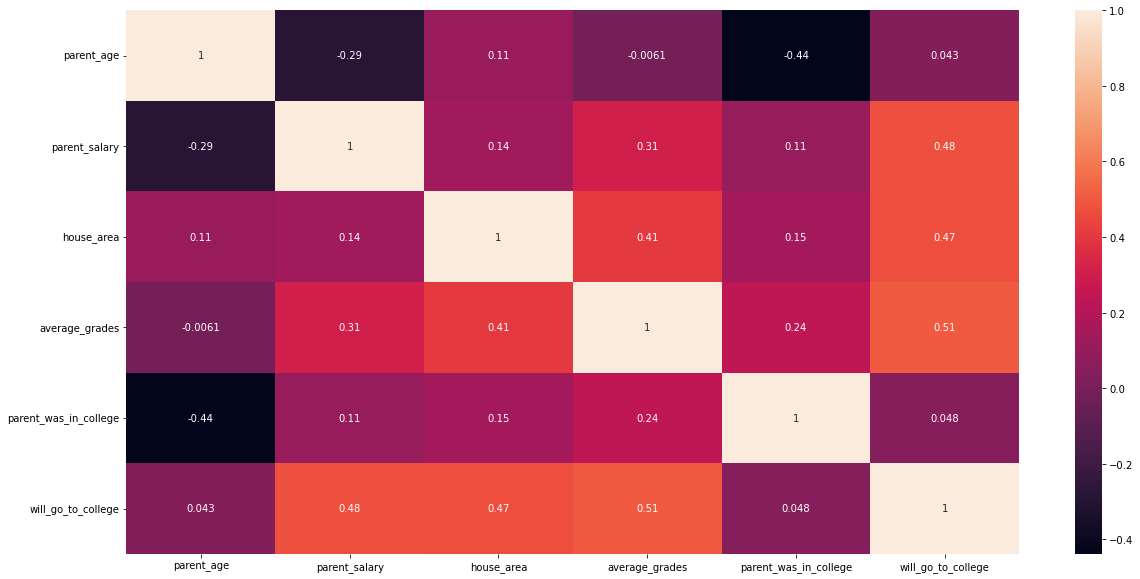

In [12]:
# Correlation Matrix 
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 The highest in negative correlation will be <code>parents_was_in_college - parent_age</code>, and with positive will be <code>parent_salary - in_college</code>, <code>house_area - in_college</code> and <code>average_grades - in_college</code> .
</div>

array([[<AxesSubplot:title={'center':'parent_age'}>,
        <AxesSubplot:title={'center':'parent_salary'}>],
       [<AxesSubplot:title={'center':'house_area'}>,
        <AxesSubplot:title={'center':'average_grades'}>]], dtype=object)

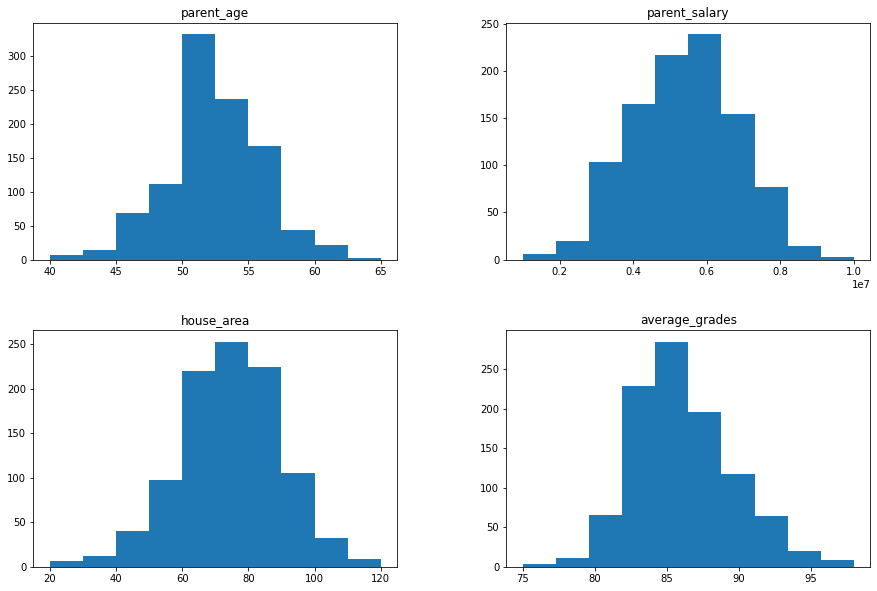

In [13]:
# Histogram for distribution
df.hist(bins=10, figsize=(15, 10),grid=False,)

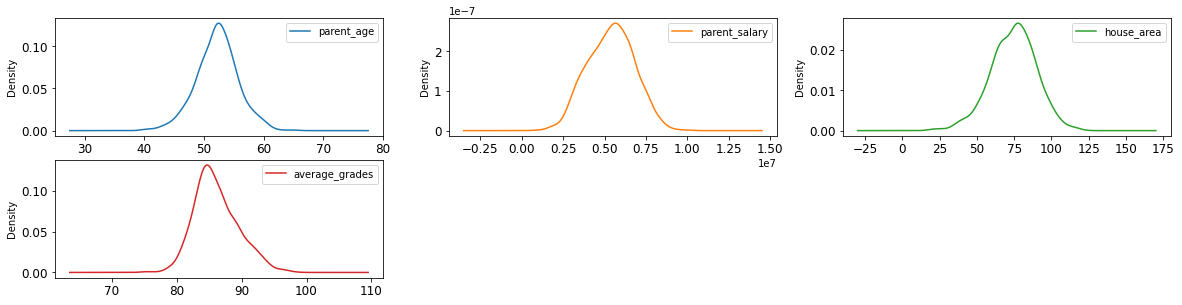

In [15]:
# density plot for distribution
df.plot(kind='density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(20,10));

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 Overall the distribution looks a liitle bit normal.
</div>

parent_age           AxesSubplot(0.125,0.71587;0.227941x0.16413)
parent_salary     AxesSubplot(0.398529,0.71587;0.227941x0.16413)
house_area        AxesSubplot(0.672059,0.71587;0.227941x0.16413)
average_grades      AxesSubplot(0.125,0.518913;0.227941x0.16413)
dtype: object

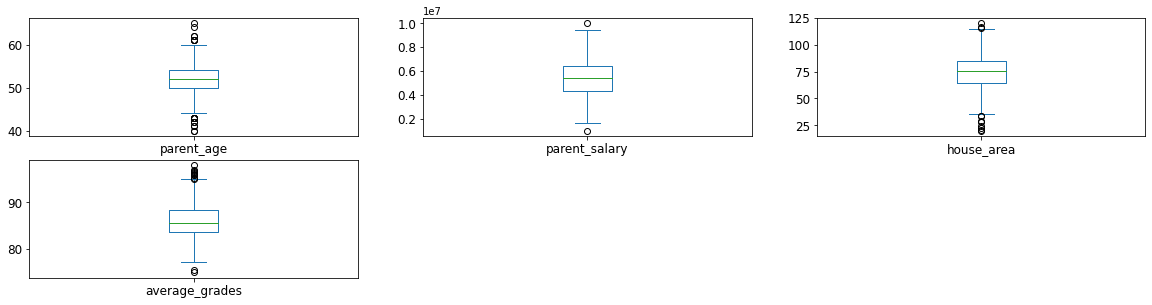

In [16]:
df.plot(kind= 'box' , subplots=True, layout=(4,3), sharex=False,
                   sharey=False,fontsize=12,figsize=(20,10))

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 Not so many outliers, so my decision is to keep it without further cleaning.
</div>

[Text(0.5, 1.0, 'Residence count based on college status')]

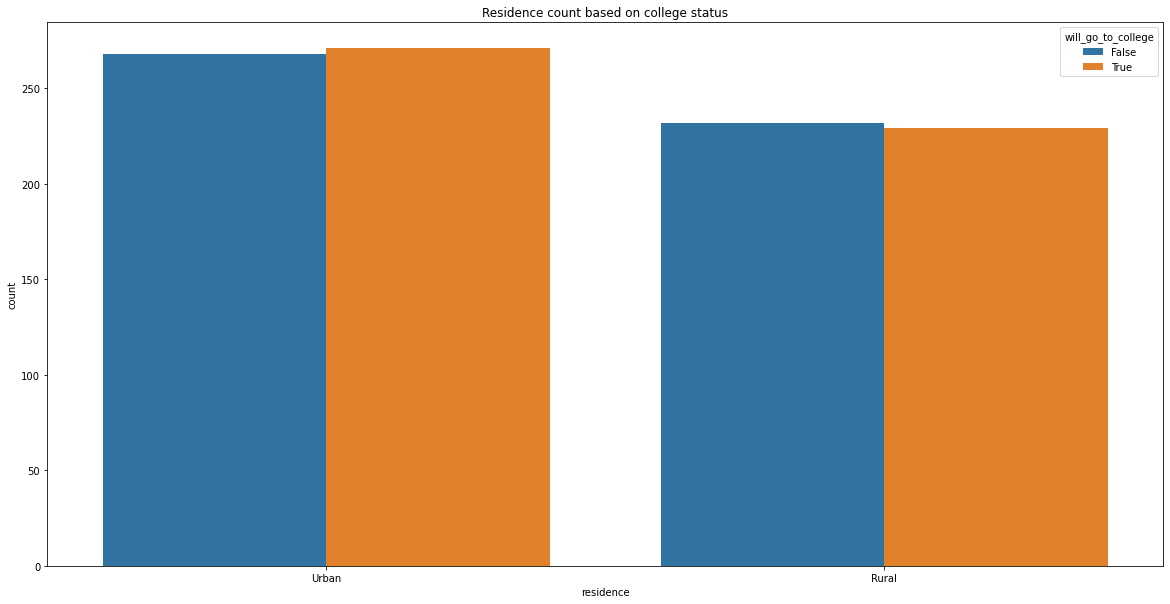

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x='residence', data=df, hue='will_go_to_college').set(title='Residence count based on college status')

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
📌 Overall the <code>Urban</code> is more likely to go to college and the opposite happens in <code>Rural</code>.
</div>

[Text(0.5, 1.0, 'Residence with parent salary based on college status')]

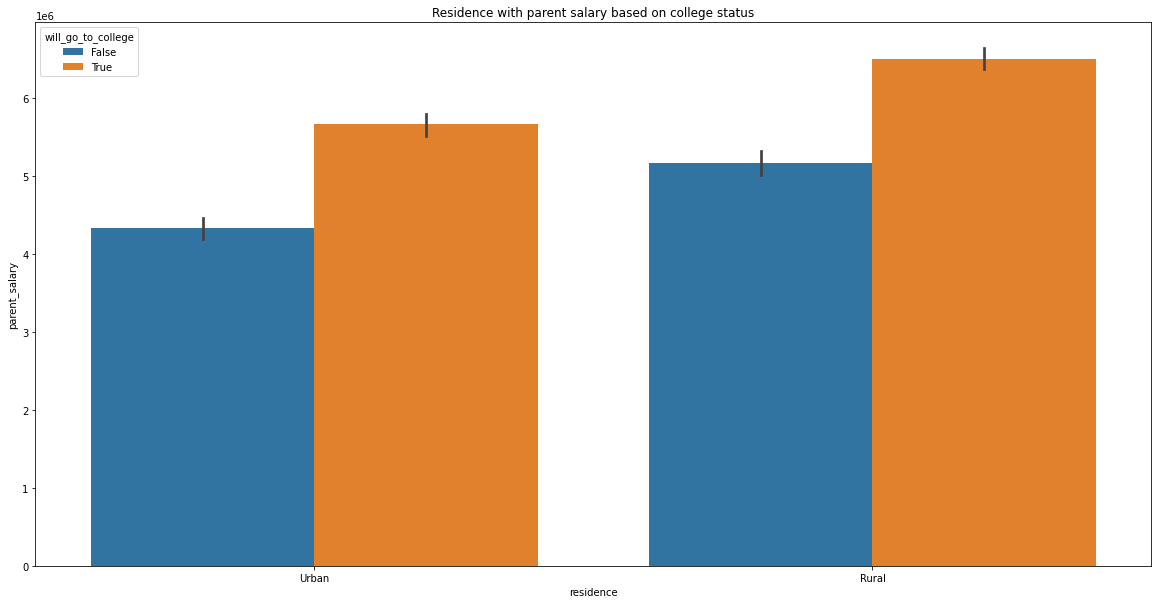

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(x='residence', y='parent_salary' ,data=df, hue='will_go_to_college').set(title='Residence with parent salary based on college status')

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
📌 The higher the salary the more likely to go to college for both <code>Urban</code> and <code>Rural</code>.
</div>

[Text(0.5, 1.0, 'Interest count based on college status')]

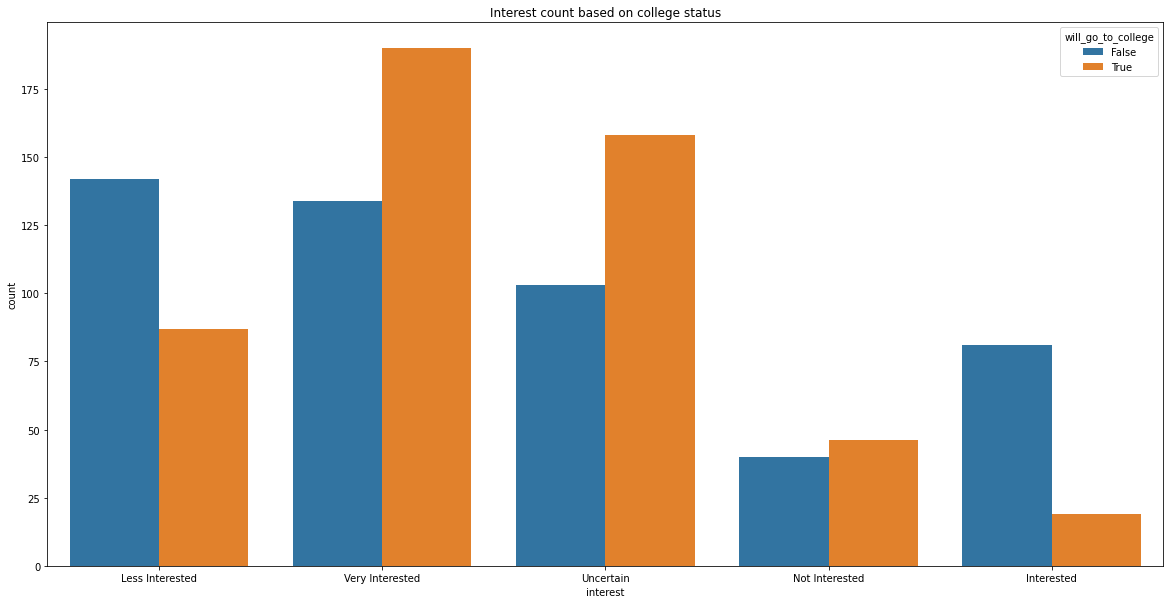

In [20]:
fig, axes = plt.subplots(figsize=(20,10))
sns.countplot(x='interest', data=df, hue='will_go_to_college').set(title='Interest count based on college status')

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
📌 <code>Very Interested</code> and <code>Uncertain Interest</code> are the two most categories attended the college, and <code>Less Interested</code> is the most category who does not attend the college.
</div>

[Text(0.5, 1.0, 'School type count based on college status')]

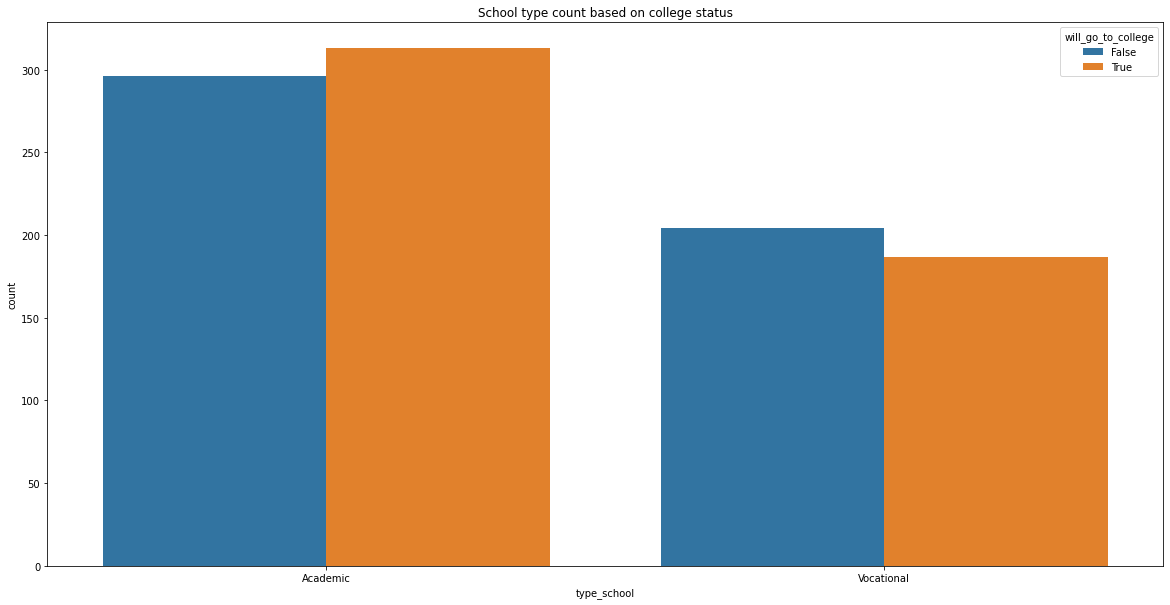

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(x='type_school',data=df, hue='will_go_to_college').set(title='School type count based on college status')

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
📌 The <code>Academic</code> is the most category attended the college.
</div>

[Text(0.5, 1.0, 'School type count based on college status')]

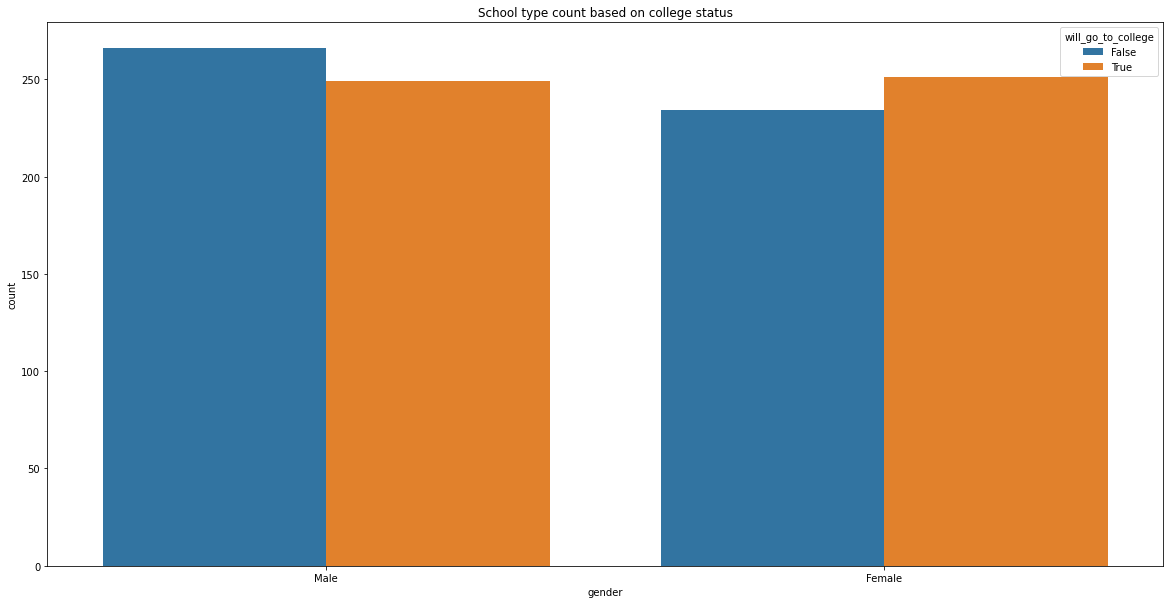

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(x='gender',data=df, hue='will_go_to_college').set(title='School type count based on college status')

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
📌 <code>Females</code> are slightly higher to attend the college than <code>Males</code>.
</div>

<Figure size 1440x720 with 0 Axes>

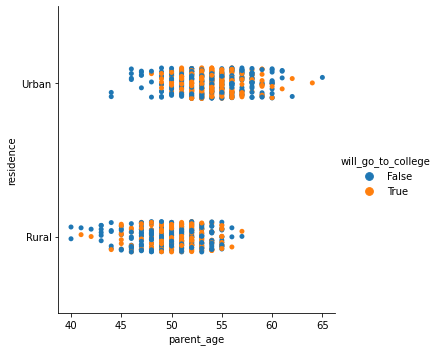

In [23]:
plt.figure(figsize=(20,10))
sns.catplot(x="parent_age", y="residence", hue="will_go_to_college", kind="strip", data=df)

<AxesSubplot:xlabel='parent_age', ylabel='residence'>

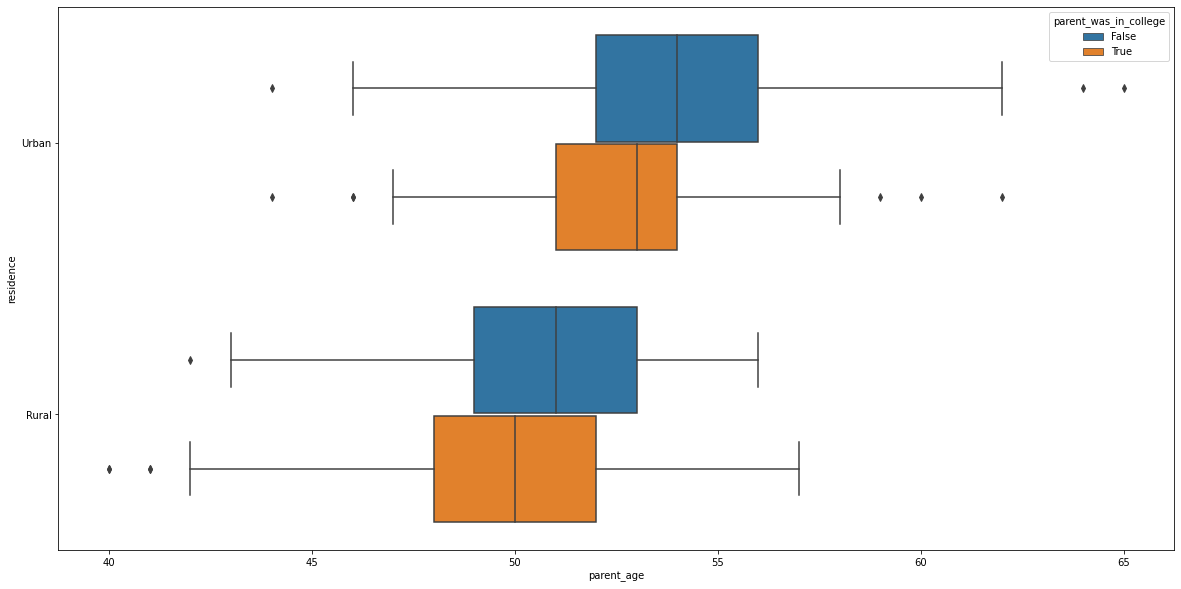

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(x="parent_age", y="residence", hue="parent_was_in_college", data=df)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
📌 <code>Urban parents</code> was slightly higher to attend the college than <code>Rural parents</code>.
</div>

<AxesSubplot:xlabel='parent_salary', ylabel='residence'>

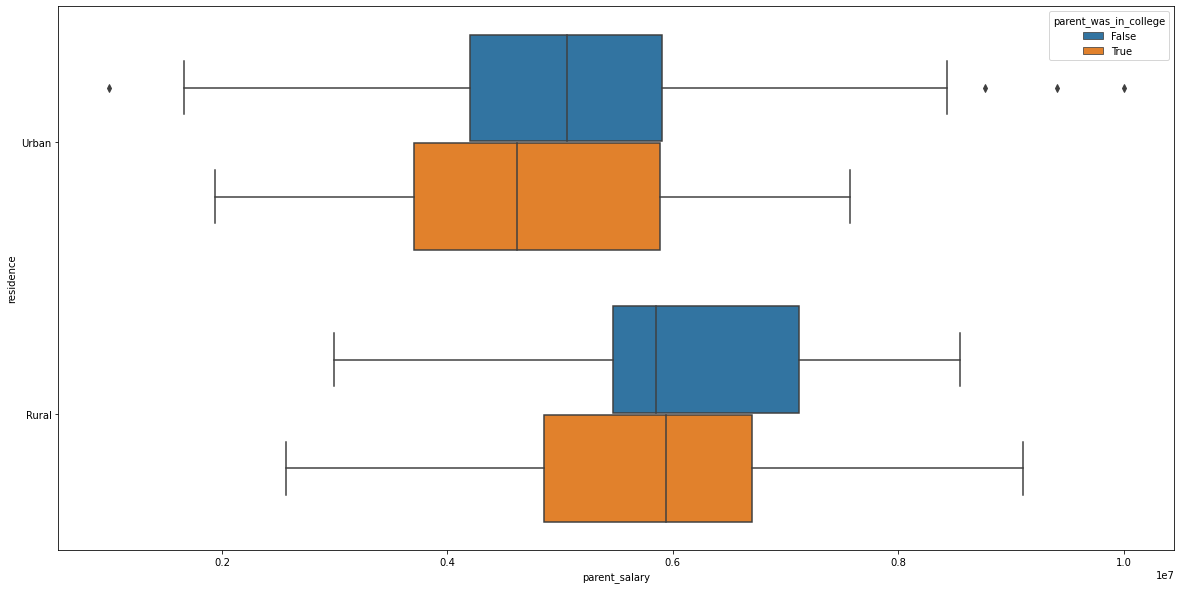

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(x="parent_salary", y="residence", hue="parent_was_in_college", data=df)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
📌 <code>Rural parents</code> was higher salery and not attended to college and the opposite for <code>Urban parents</code>.
</div>

<AxesSubplot:xlabel='parent_salary', ylabel='residence'>

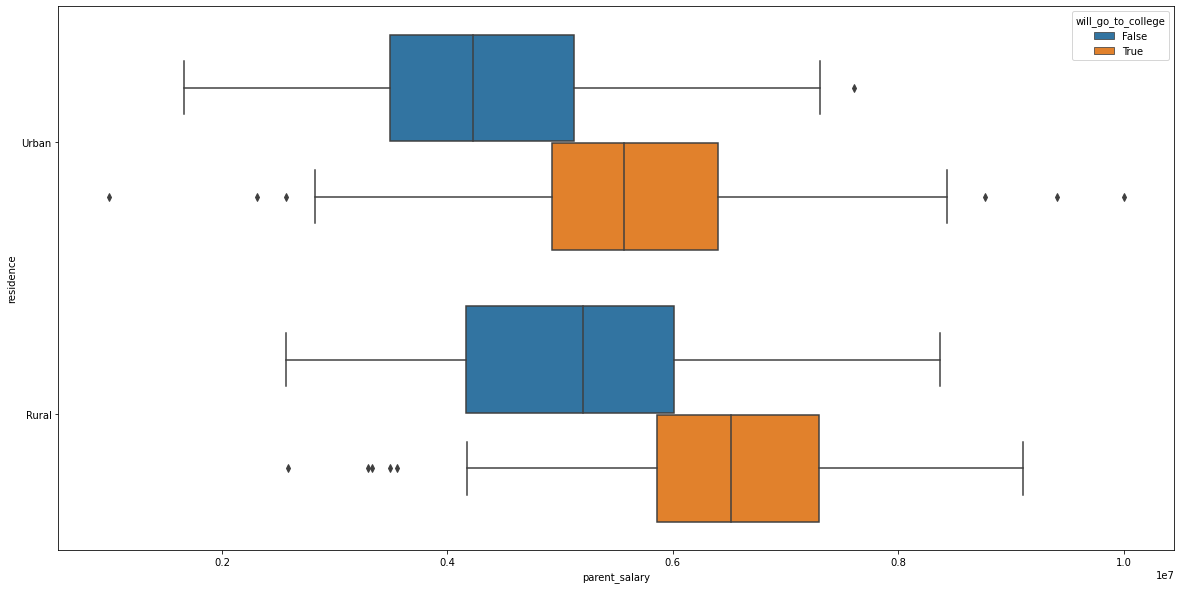

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(x="parent_salary", y="residence", hue="will_go_to_college", data=df)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
📌 The more salery in both Rural and Urban parents the more likely for child to attend the college.
</div>

<AxesSubplot:xlabel='house_area', ylabel='residence'>

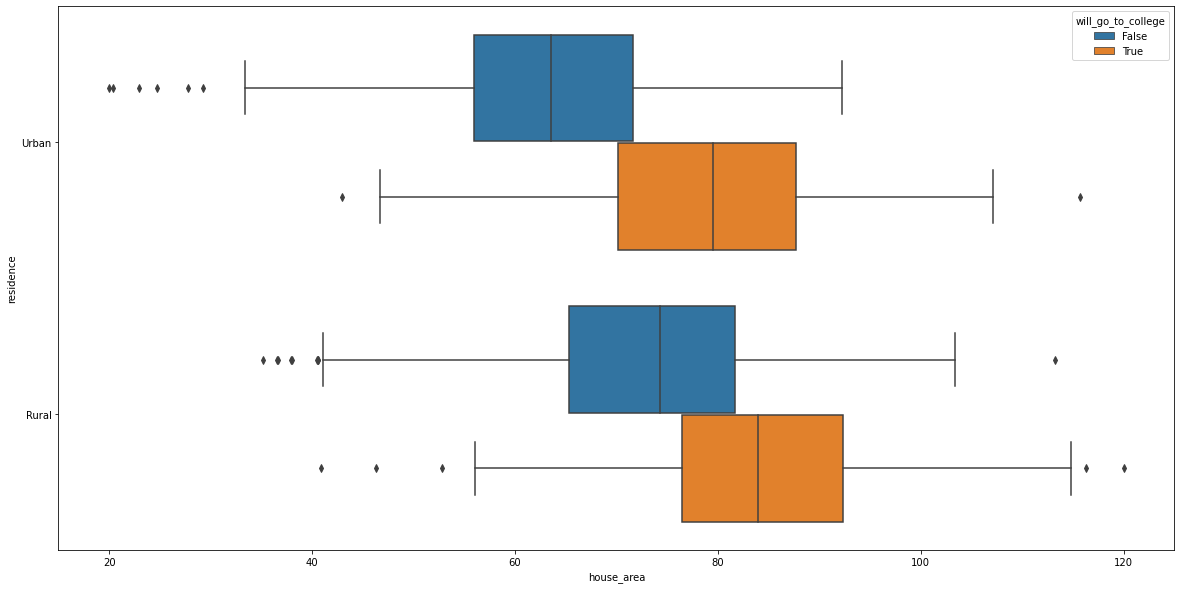

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x="house_area", y="residence", hue="will_go_to_college", data=df)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
📌 The more house area in both Rural and Urban the more likely for child to attend the college, that's means by logic the family has more salary overall.
</div>

<AxesSubplot:xlabel='average_grades', ylabel='gender'>

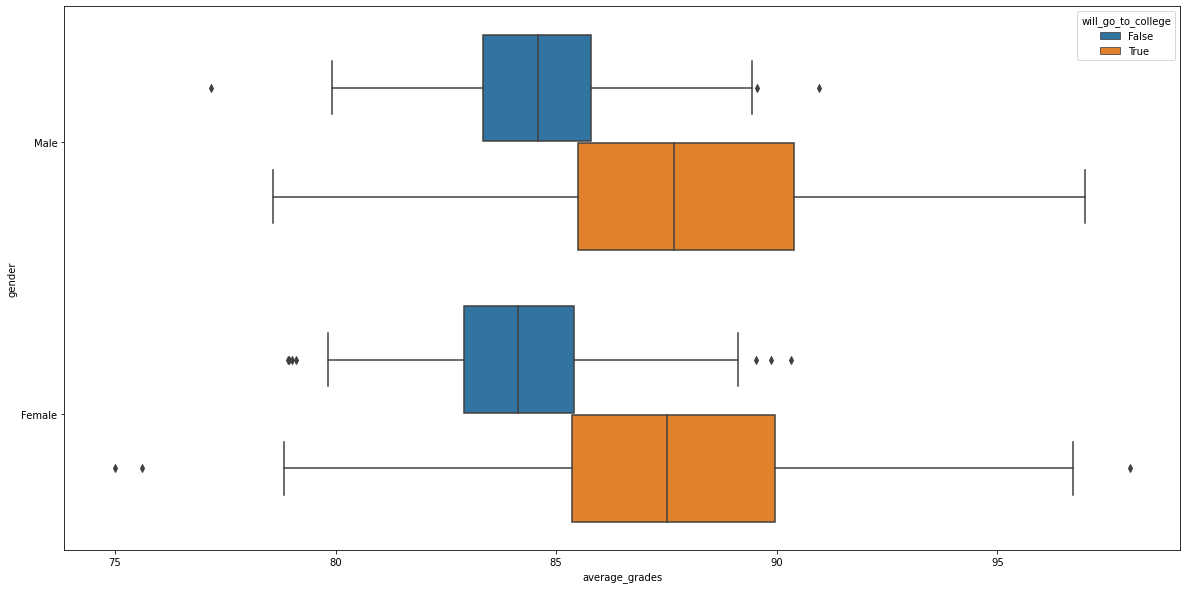

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(x="average_grades", y="gender", hue="will_go_to_college", data=df)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
📌 The more average grades in both males and females the more likely to attend college.
</div>

<AxesSubplot:xlabel='average_grades', ylabel='Density'>

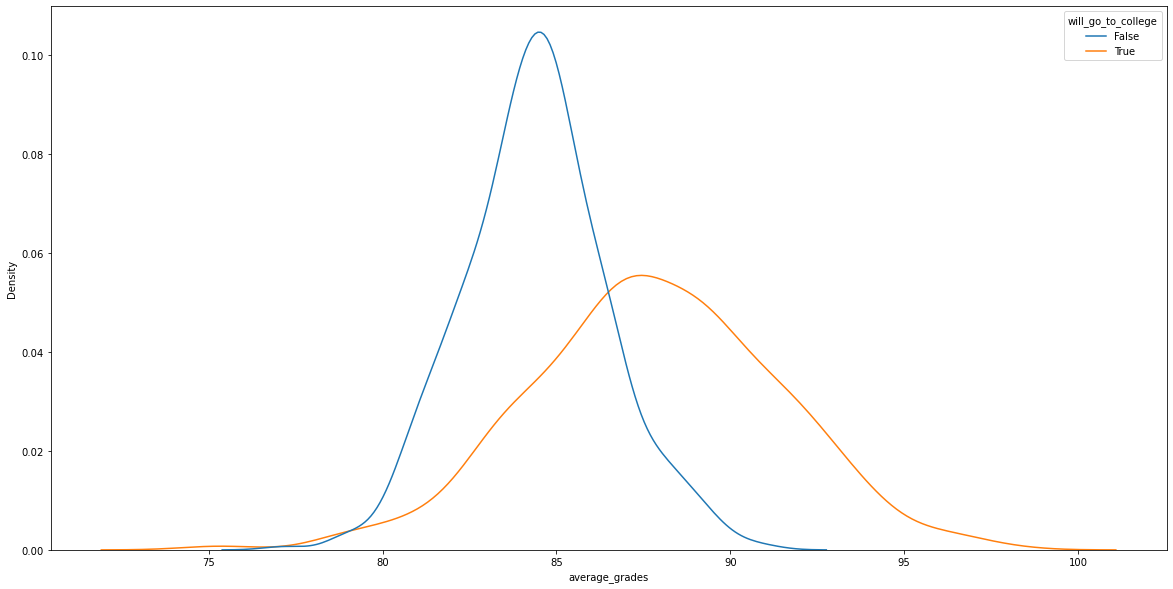

In [29]:
plt.figure(figsize=(20,10))
sns.kdeplot(x="average_grades", hue="will_go_to_college", data=df)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
📌 The higher on average grades the more likely to attend the college.
</div>

<AxesSubplot:xlabel='parent_age', ylabel='Density'>

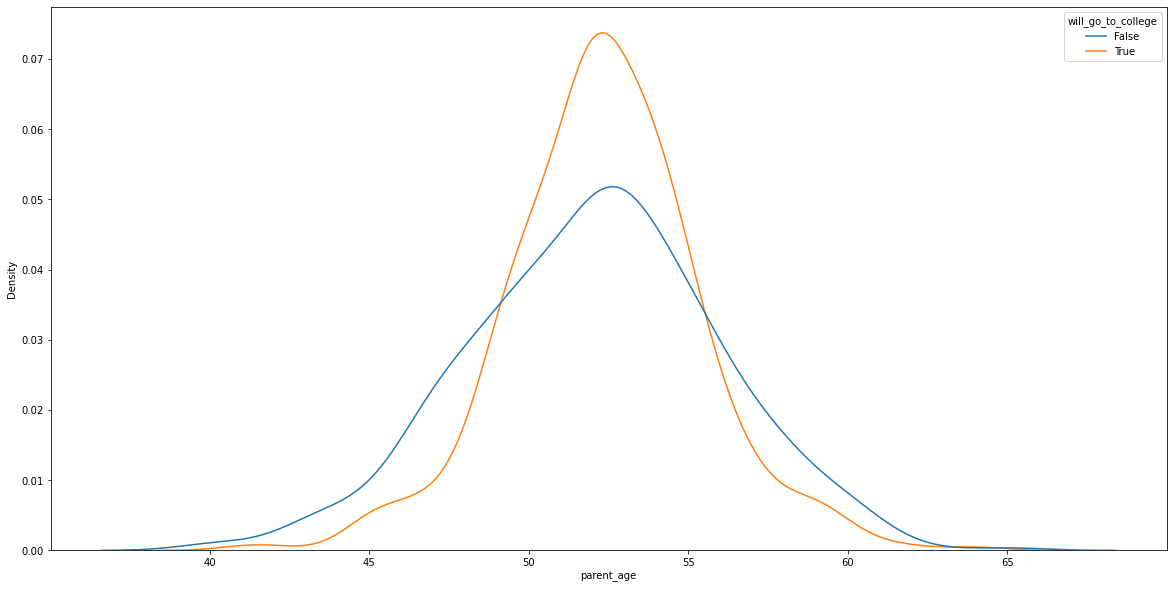

In [30]:
plt.figure(figsize=(20,10))
sns.kdeplot(x="parent_age", hue="will_go_to_college", data=df)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
📌 Not so much effect by the age of parents for a child to attend the college.
</div>

<AxesSubplot:xlabel='parent_salary', ylabel='Density'>

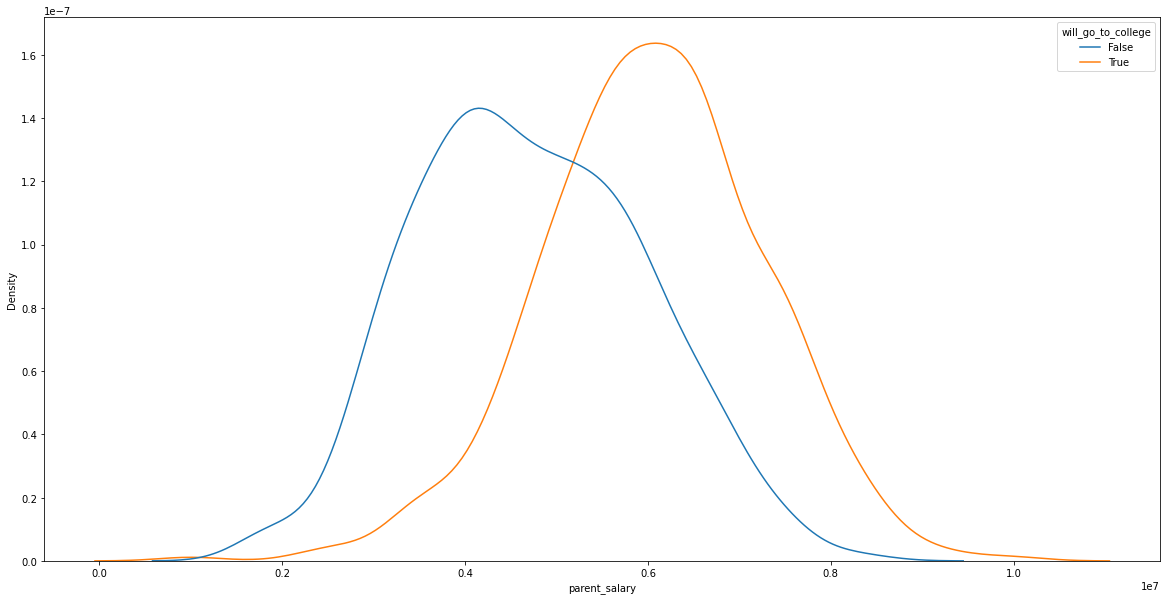

In [31]:
plt.figure(figsize=(20,10))
sns.kdeplot(x="parent_salary", hue="will_go_to_college", data=df)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
📌 The higher on parent's salary the more likely for the child to attend college.
</div>

<AxesSubplot:xlabel='house_area', ylabel='Density'>

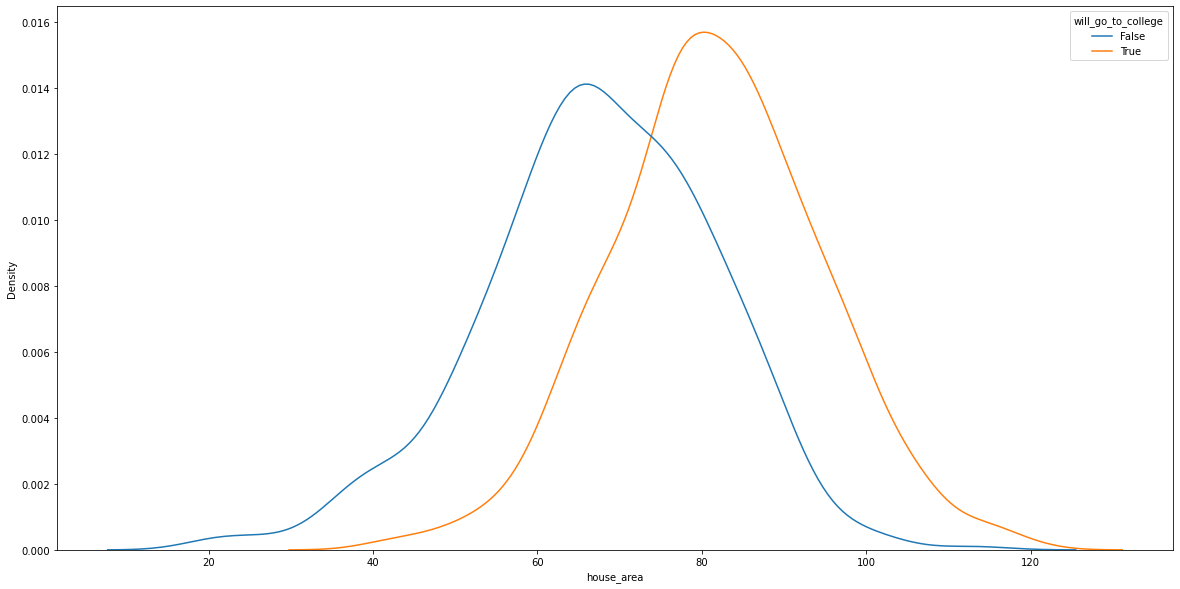

In [32]:
plt.figure(figsize=(20,10))
sns.kdeplot(x="house_area", hue="will_go_to_college", data=df)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
📌 The higher on house area the more likely for the child to attend college.
</div>

# Modeling

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  will_go_to_college     1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


In [34]:
df['type_school'].value_counts()

Academic      609
Vocational    391
Name: type_school, dtype: int64

In [35]:
df['school_accreditation'].value_counts()

B    519
A    481
Name: school_accreditation, dtype: int64

In [36]:
df['interest'].value_counts()

Very Interested    324
Uncertain          261
Less Interested    229
Interested         100
Not Interested      86
Name: interest, dtype: int64

In [37]:
df['residence'].value_counts()

Urban    539
Rural    461
Name: residence, dtype: int64

In [38]:
# Convert categorical column to numeric ones
df['type_school']=df['type_school'].map({'Academic': 0,'Vocational': 1})
df['school_accreditation']=df['school_accreditation'].map({'A': 0,'B': 1})
df['gender']=df['gender'].map({'Male': 0,'Female': 1})
df['interest']=df['interest'].map({'Very Interested': 0,'Uncertain': 1,'Less Interested':2,'Quiet Interested':3, 'Not Interested':4})
df['residence']=df['residence'].map({'Urban':0,'Rural': 1})
df["parent_was_in_college"] = df["parent_was_in_college"].astype(int)
df["will_go_to_college"] = df["will_go_to_college"].astype(int)
df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,0,0,0,2.0,0,56,6950000,83.0,84.09,0,1
1,0,0,0,2.0,0,57,4410000,76.8,86.91,0,1
2,0,1,1,0.0,0,50,6500000,80.6,87.43,0,1
3,1,1,0,0.0,1,49,6600000,78.2,82.12,1,1
4,0,0,1,0.0,0,57,5250000,75.1,86.79,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,0.0,1,49,7420000,63.6,85.99,1,1
996,0,1,1,2.0,1,51,7480000,84.3,89.72,1,1
997,1,0,0,2.0,0,49,5550000,75.2,79.56,0,1
998,0,1,0,1.0,1,53,5840000,105.8,87.18,1,1


In [58]:
df.isna().sum()

type_school                0
school_accreditation       0
gender                     0
interest                 100
residence                  0
parent_age                 0
parent_salary              0
house_area                 0
average_grades             0
parent_was_in_college      0
will_go_to_college         0
dtype: int64

In [59]:
df.dropna(inplace=True)

In [60]:
X = df.drop(['will_go_to_college'], axis=1)
y = df['will_go_to_college']

In [61]:
X

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college
0,0,0,0,2.0,0,56,6950000,83.0,84.09,0
1,0,0,0,2.0,0,57,4410000,76.8,86.91,0
2,0,1,1,0.0,0,50,6500000,80.6,87.43,0
3,1,1,0,0.0,1,49,6600000,78.2,82.12,1
4,0,0,1,0.0,0,57,5250000,75.1,86.79,0
...,...,...,...,...,...,...,...,...,...,...
994,0,1,1,2.0,0,52,3270000,65.0,85.16,0
995,1,0,1,0.0,1,49,7420000,63.6,85.99,1
996,0,1,1,2.0,1,51,7480000,84.3,89.72,1
997,1,0,0,2.0,0,49,5550000,75.2,79.56,0


In [62]:
X.isna().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
dtype: int64

In [63]:
X.dropna(inplace=True)

In [64]:
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Evaluation Mertics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
# Other 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing

In [65]:
X.shape

(900, 10)

In [66]:
y.shape

(900,)

In [67]:
# Scaling the data 
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.20, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((720, 10), (720,), (180, 10), (180,))

## Logistic Regression

In [69]:
log = LogisticRegression()
log.fit(X_train, y_train)

log_score = log.score(X_test, y_test)
print('\nThe Logistic Regression accuracy score is {:03.2f}\n'.format(log_score))


The Logistic Regression accuracy score is 0.83



In [70]:
from sklearn.feature_selection import SelectKBest, f_regression

clf2 = make_pipeline(SelectKBest(f_regression, k=4),LogisticRegression())

scores = cross_val_score(clf2, Xs, y, cv=3)

# Get average of 3-fold cross-validation score using an LR estimator.
n_folds = 3
cv_error = np.average(cross_val_score(LogisticRegression(), Xs, y, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.5f}\n'.format(n_folds, cv_error))



The 3-fold cross-validation accuracy score for this classifier is 0.84000



In [71]:
print(scores)
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

[0.80333333 0.79666667 0.79666667]
Average score and uncertainty: (79.89 +- 0.181)%



The Logistic Regression accuracy score is 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81        81
           1       0.83      0.86      0.85        99

    accuracy                           0.83       180
   macro avg       0.83      0.82      0.83       180
weighted avg       0.83      0.83      0.83       180

The Confusion Matrix:
 [[64 17]
 [14 85]]


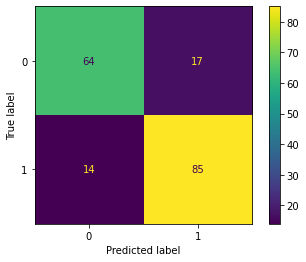

In [72]:
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print('\nThe Logistic Regression accuracy score is {:03.2f}\n'.format(log_score))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("The Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log.classes_)
disp.plot()
plt.show()

In [73]:
from sklearn.metrics import roc_curve, auc
size = metrics.roc_auc_score(y_test, y_pred)
print(size)

0.824354657687991


## K-Neighbors

In [74]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)

kn_score = kn.score(X_test, y_test)
print('\nThe K-Neighbors accuracy score is {:03.2f}\n'.format(kn_score))


The K-Neighbors accuracy score is 0.86



In [75]:
from sklearn.feature_selection import SelectKBest, f_regression

clf2 = make_pipeline(SelectKBest(f_regression, k=4),KNeighborsClassifier())

scores = cross_val_score(clf2, Xs, y, cv=3)

# Get average of 3-fold cross-validation score using an KN estimator.
n_folds = 3
cv_error = np.average(cross_val_score(KNeighborsClassifier(), Xs, y, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.5f}\n'.format(n_folds, cv_error))



The 3-fold cross-validation accuracy score for this classifier is 0.82111



In [76]:
print(scores)
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

[0.82333333 0.82666667 0.79666667]
Average score and uncertainty: (81.56 +- 0.775)%



The K-Neighbors accuracy score is 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85        81
           1       0.90      0.83      0.86        99

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180

The Confusion Matrix:
 [[72  9]
 [17 82]]


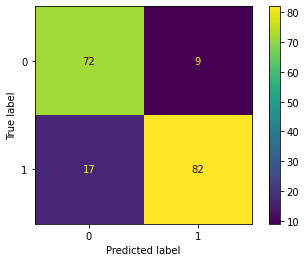

In [77]:
kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)

print('\nThe K-Neighbors accuracy score is {:03.2f}\n'.format(kn_score))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("The Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=kn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=kn.classes_)
disp.plot()
plt.show()

In [78]:
from sklearn.metrics import roc_curve, auc
size = metrics.roc_auc_score(y_test, y_pred)
print(size)

0.8585858585858586


## SVM

In [79]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)

svm_score = svm.score(X_test, y_test)
print('\nThe classifier accuracy score is {:03.2f}\n'.format(svm_score))


The classifier accuracy score is 0.89



In [80]:
from sklearn.feature_selection import SelectKBest, f_regression

clf2 = make_pipeline(SelectKBest(f_regression, k=4),SVC(probability=True))

scores = cross_val_score(clf2, Xs, y, cv=3)

# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.5f}\n'.format(n_folds, cv_error))



The 3-fold cross-validation accuracy score for this classifier is 0.87222



In [81]:
print(scores)
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

[0.82666667 0.83       0.83333333]
Average score and uncertainty: (83.00 +- 0.157)%



The Support Vector Machine accuracy score is 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88        81
           1       0.90      0.91      0.90        99

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180

The Confusion Matrix:
 [[71 10]
 [ 9 90]]


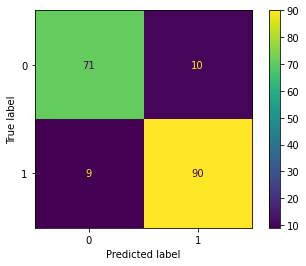

In [82]:
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print('\nThe Support Vector Machine accuracy score is {:03.2f}\n'.format(svm_score))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("The Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.show()

In [83]:
from sklearn.metrics import roc_curve, auc
size = metrics.roc_auc_score(y_test, y_pred)
print(size)

0.8928170594837261


## Random Forest Classifier

In [84]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_score = rfc.score(X_test, y_test)
print('\nThe Random Forest Classifier accuracy score is {:03.2f}\n'.format(rfc_score))


The Random Forest Classifier accuracy score is 0.89



In [85]:
from sklearn.feature_selection import SelectKBest, f_regression

clf2 = make_pipeline(SelectKBest(f_regression, k=4),RandomForestClassifier())

scores = cross_val_score(clf2, Xs, y, cv=3)

# Get average of 3-fold cross-validation score using an RF estimator.
n_folds = 3
cv_error = np.average(cross_val_score(RandomForestClassifier(), Xs, y, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.5f}\n'.format(n_folds, cv_error))



The 3-fold cross-validation accuracy score for this classifier is 0.88556



In [86]:
print(scores)
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

[0.83333333 0.82333333 0.79666667]
Average score and uncertainty: (81.78 +- 0.894)%



The Random Forest Classifier accuracy score is 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87        81
           1       0.88      0.93      0.90        99

    accuracy                           0.89       180
   macro avg       0.89      0.88      0.89       180
weighted avg       0.89      0.89      0.89       180

The Confusion Matrix:
 [[68 13]
 [ 7 92]]


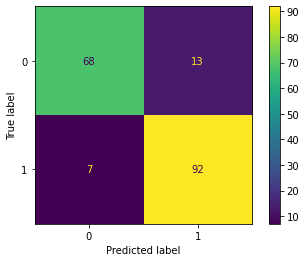

In [87]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('\nThe Random Forest Classifier accuracy score is {:03.2f}\n'.format(rfc_score))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("The Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()

In [88]:
from sklearn.metrics import roc_curve, auc
size = metrics.roc_auc_score(y_test, y_pred)
print(size)

0.8843995510662177
